# Density of States Calculation

The **Density of States (DOS)** is a fundamental concept in condensed matter physics and materials science. It describes how many states are available within a specific energy range for particle to occupy. In essence, it quantifies the number of quantum states per unit energy interval at each energy level, giving insight into a material's electronic, optical, and thermal properties.

Mathematically, the DOS $D(E)$ is defined as:

$$
D(E) = \frac{dN}{dE}
$$

where $N(E)$ is the number of states with energy less than or equal to $E$.

Direct computation of the DOS involves diagonalizing the system’s Hamiltonian, which has a computational complexity of $\mathcal{O}(n^3)$, where $n$ is the system size. This becomes infeasible for large or complex systems, such as disordered materials or many-body interacting systems. To address this, we use the **Kernel Polynomial Method (KPM)** \[1], an efficient and scalable technique for estimating the DOS. KPM reduces the problem to a **trace estimation**, which scales as $\mathcal{O}(n)$ - $\mathcal{O}(n^3)$, making it highly suitable for large sparse Hamiltonians.

### The KPM Algorithm

The core idea of KPM is to approximate the DOS using a series expansion in **Chebyshev polynomials**, which are numerically stable and well-suited for functions defined on the interval $[-1, 1]$. The method proceeds in the following steps:

#### 1. **Rescale the Hamiltonian**

Since Chebyshev polynomials are defined on $[-1, 1]$, the Hamiltonian $H$ must be linearly rescaled so that all its eigenvalues fall within this interval:

$$
\tilde{H} = \frac{H - b}{a}
$$

where $a$ and $b$ are determined based on the spectral bounds (minimum and maximum eigenvalues) of $H$.

#### 2. **Expand DOS in Chebyshev Polynomials**

The DOS is approximated by a finite sum over Chebyshev polynomials $T_n(E)$:

$$
\rho(E) \approx \frac{1}{\pi \sqrt{1 - E^2}} \left[ \mu_0 + 2 \sum_{n=1}^{N-1} \mu_n T_n(E) \right]
$$

where $\mu_n$ are the **Chebyshev moments**, given by:

$$
\mu_n = \text{Tr}[T_n(\tilde{H})]
$$

These moments encode how each polynomial contributes to reconstructing the DOS.

#### 3. **Estimate the Trace Stochastically**

Instead of computing the trace exactly (which can be costly), we approximate it using a small number of random vectors $|r\rangle$:

$$
\mu_n \approx \frac{1}{R} \sum_{r=1}^{R} \langle r | T_n(\tilde{H}) | r \rangle
$$

This is known as **stochastic trace estimation** (typically sclaes as $\mathcal{O(n)}$), and it significantly reduces computational cost while maintaining accuracy for large matrices (as R is inversly proportional to the dimension of the Hamiltonian).

#### 4. **Apply a Smoothing Kernel**

To mitigate Gibbs oscillations caused by truncating the polynomial series, a smoothing kernel (such as the **Jackson kernel**) is applied to the coefficients:

$$
\mu_n \rightarrow g_n \mu_n
$$

where $g_n$ are kernel weights that damp high-frequency components, leading to a smoother and more physically accurate approximation of the DOS.

### Practical Usage with Kwant

To demonstrate KPM in practice, we will use the excellent Python library **[Kwant](https://kwant-project.org/)** \[2], which provides built-in functions for computing the DOS and related observables efficiently using methods like KPM.

In [1]:
##import the necesaary libraries
import numpy as np
import matplotlib.pyplot as plt
##import the lattice types (triagle, square, hexagonal..etc)
from moirepy import BilayerMoireLattice, TriangularLayer, SquareLayer, KagomeLayer, HexagonalLayer

In [2]:
#import kwant for calculations
import kwant
#!pip install kwant

/home/jabed/miniconda3/envs/quant/lib/python3.10/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [32]:
## Make the lattice (Lattice type, a(ll1), b(ll2), m(ul1), n(ul2), x_no, y_no)---  
## don't put fractional values for x_no and y_no, which are number of moire unit cells
lattice = BilayerMoireLattice(TriangularLayer, 3, 4, 4, 3, 6, 6)
## make the hamiltonian (tuu, tdd, tud, tdu, tdd, mu1, mu2)
ham = lattice.generate_hamiltonian(1, 1, 0.01, 0.01, 0, 0.0)

twist angle = 0.1646 rad (9.4300 deg)
1332 points in lower lattice
1332 points in upper lattice


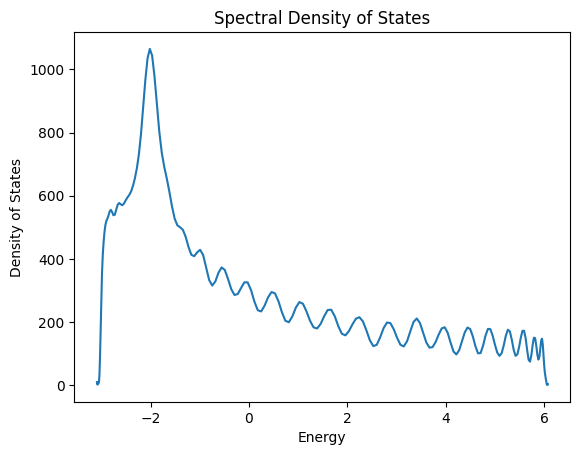

In [33]:
## estimate the spectral density of states
x = kwant.kpm.SpectralDensity(ham, params=None, operator=None, num_vectors=10, num_moments=100)
e, rho = x()
plt.plot(e, rho)
plt.xlabel('Energy')
plt.ylabel('Density of States')
plt.title('Spectral Density of States')
plt.show()

### Expectation value of Operator calculation using KPM

## References
1. Alexander Weibe, Gerhard Wellein, Andreas Alvermann and Holger Fehske, The kernel polynomial method, Reviews of Modern Physics, Volume 78, January 2006
   
2. C. W. Groth, M. Wimmer, A. R. Akhmerov, X.Waintal, Kwant: a software package for quantum transport, New J. Phys. 16, 063065 (2014).